In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### read in csv into dataframe

In [2]:
# Read the csv file into a pandas DataFrame
brains = pd.read_csv('data/brain.csv')
brains.head()

,gender,age,size,weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### reshape values into ndarray

In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = brains["weight"].values.reshape(-1, 1)
y = brains["size"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (237, 1) (237, 1)


Text(0, 0.5, 'Head Size')

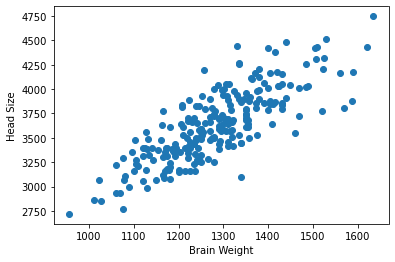

In [4]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Brain Weight")
plt.ylabel("Head Size")
### END SOLUTION

### linear regression model build

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

## quantify the model

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 51228.19330570998
R-squared (R2 ): 0.6568088729208812


In [9]:
model.score(X_test, y_test)

0.6568088729208812

## plot the line

In [10]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

In [11]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

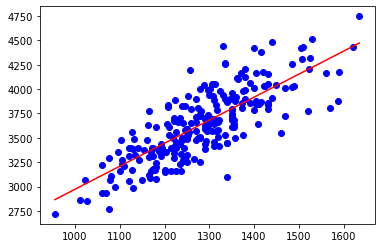

In [12]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

## print the model.coef_ and model.intercept_

In [13]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[2.35989976]]
y-axis intercept:  [613.3001767]


## save and reload the trained model

In [14]:
import pickle
# save the model to disk
filename = 'linearregression_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [15]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6568088729208812
